#Introdução	à	Ciência	de	Dados - SME 0828

#Lista	de	exercícios	4
#Regressão Logística e k-vizinhos

##Nome: João Victor Sene Araújo
##NUSP: 11796382

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression

import seaborn as sns # Biblioteca para mostrar os gráficos
sns.set()

###1 – Considere as bases Iris e Vehicle. Em um mesmo gráfico, mostre a acurácia em função de k para o método k-vizinhos.

In [ ]:
datas = []

data1 = pd.read_csv('data/iris.csv', header=(0))
data1.name = 'Iris'
datas.append(data1)

data1.head(10) # Mostra os 10 primeiros dados (linhas)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
data2 = pd.read_csv('data/Vehicle.csv', header=(0))
data2.name = 'Vehicle'
datas.append(data2)

data2.head(10) # Mostra os 10 primeiros dados (linhas)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


Dataframe: Iris 
	Melhor k: 1
Dataframe: Vehicle 
	Melhor k: 5


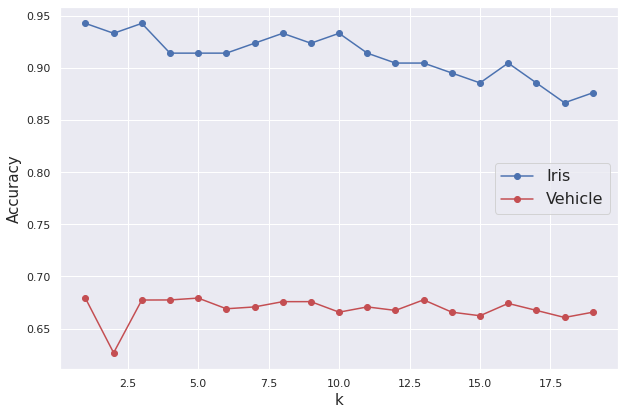

In [ ]:
plt.figure(figsize=(10, 20/3))

# Cores do gráfico
i=0
cl = ["b","r"]

for df in datas:

    # Converte o dataframe para NumPy Array
    dfnp = df.to_numpy()
    nrow,ncol = dfnp.shape
    y = dfnp[:,-1]
    X = dfnp[:,0:ncol-1]

    # Normalização
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    # Seleciona os pares x & y de treino e de teste
    p = 0.7 # Porcentagem de dados que serão usados para treino
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

    nkf = 5 # Number of folds
    vk = [] # Armazena os valores de k
    vscore = []
    for k in range(1, 20):
        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        # Realiza a validação cruzada
        cv = cross_validate(model, x_train, y_train, cv=nkf)
        vscore.append(cv['test_score'].mean()) 
        vk.append(k)

    plt.plot(vk, vscore, '-bo',label=df.name,color=cl[i])
    plt.xlabel('k', fontsize = 15)
    plt.ylabel('Accuracy', fontsize = 15)
    
    best_k = np.argmax(vscore)+1
    print('Dataframe:',df.name,'\n\tMelhor k:', best_k)
    
    i+=1


plt.legend(loc=7, prop={'size': 16})
plt.show(True)

###2 – Considere os dados gerados com o código abaixo e obtenha as regiões de separação usando o método k-vizinhos para diferentes valores de k. Compare com as regiões obtidas usando o método regressão logística.

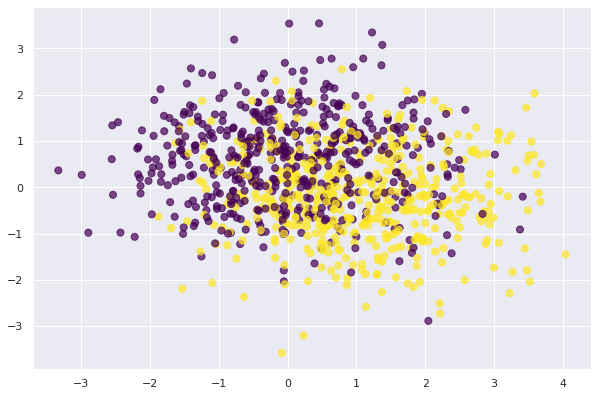

In [ ]:
plt.figure(figsize=(10,20/3))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.9)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

####Método k-vizinhos:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


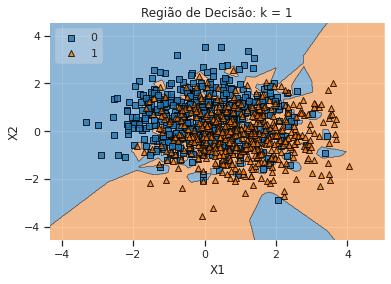

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


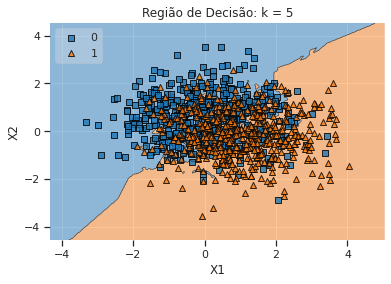

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


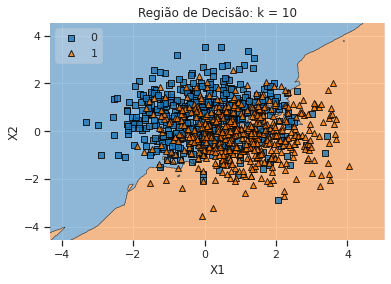

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


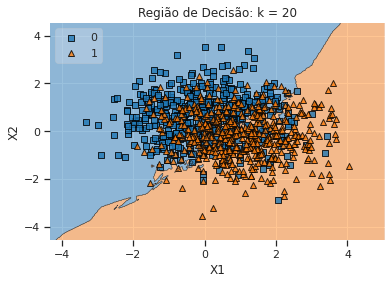

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


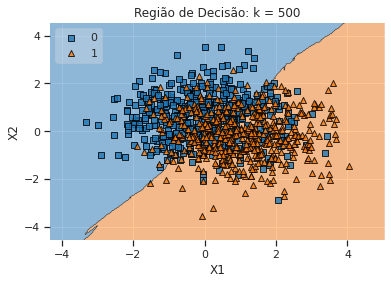

In [ ]:
# Mostra as regiões de separação para diversos valores de k
vk = [1,5,10,20,int(n_samples/2)]
for k in vk:
    # Treinando o classificador de K-vizinhos
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotando regiões de decisão
    plot_decision_regions(X=X, y=y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Região de Decisão: k = '+str(k))
    plt.show()

####Método Regressão Logística

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


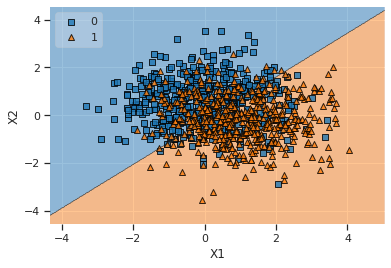

In [ ]:
# Treinando o classificador de Regressão Logística
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotando a região de decisão
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

###3 – Classifique as bases Iris e Vehicle usando regressão logística e compare com o método kvizinhos.

####Classificação por Regressão Logística e K-vizinhos:

In [ ]:
# Realiza a leitura dos dados
datas = []

datas.append(pd.read_csv('data/iris.csv', header=(0)))
datas.append(pd.read_csv('data/Vehicle.csv', header=(0)))

datas[0].name = 'Iris'
datas[1].name = 'Vehicle'

for data in datas: 
    # Transforma os dados para o numpy
    datanp = data.to_numpy()
    nrow,ncol = datanp.shape
    y = datanp[:,-1]
    X = datanp[:,0:ncol-1]

    # Normalização
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    # Seleciona os conjuntos de treinamento e teste
    p = 0.7 
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p)

    # Descobre qual o melhor valor de k para fazer a classificação:

    nkf = 5 # Number of folds
    vk = [] # Armazena os valores de k
    vscore = []
    for k in range(1, 20):
        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        # Realiza a validação cruzada
        cv = cross_validate(model, x_train, y_train, cv=nkf)
        vscore.append(cv['test_score'].mean())
        vk.append(k)

    best_k = np.argmax(vscore)+1 # Melhor número de vizinhos

    # Ajusta o modelo de Regrassão Logistica
    model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 10000)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    print('Dataframe:',data.name,'\n\tRegressão Logística:\n\t\tAcurácia: ', model.score(x_test, y_test))

    # Ajusta o modelo k-vizinhos
    model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
    model.fit(x_train,y_train)
    # Faz a predição no conjunto de teste
    y_pred = model.predict(x_test) 
    # Verifica a acurácia da predição
    score = accuracy_score(y_pred, y_test)

    print('\tK-vizinhos:\n\t\tAcurácia: ', model.score(x_test, y_test))

Dataframe: Iris 
	Regressão Logística:
		Acurácia:  0.9333333333333333
	K-vizinhos:
		Acurácia:  0.9333333333333333
Dataframe: Vehicle 
	Regressão Logística:
		Acurácia:  0.7637795275590551
	K-vizinhos:
		Acurácia:  0.7244094488188977


Como foi possível observar, a classificação utilizando o método de Regressão Logística obteve uma maior Acurácia em ambos Dataframes.